# Mushrooms Poisonability Prediction Models

- Sara Thibierge 
- Cassie Doguet
- Antonin Dussart

As we are 3 friends who likes to catch mushrooms during autumn we thought it could be interesting to know more about it.
On this notebook you will find some visualisations about mushrooms features and some predictions models to predict their poisonability.

Here is the link to the dataset we used:
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

## 1. Importations

### 1.1 Imported libraries

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import json

### 1.2 Loading of the dataset

In [399]:
# load mushrooms.csv
df = pd.read_csv('mushrooms.csv')
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [400]:
row_index = 449  # Specify the index of the row you want to display

# Display the values of the row at index 449
row_449_values = df.iloc[row_index].to_dict()

# Print the values
print(f"Values of the row at index 449:")
print(row_449_values)

Values of the row at index 449:
{'class': 'e', 'cap-shape': 'x', 'cap-surface': 'f', 'cap-color': 'n', 'bruises': 't', 'odor': 'n', 'gill-attachment': 'f', 'gill-spacing': 'c', 'gill-size': 'b', 'gill-color': 'n', 'stalk-shape': 't', 'stalk-root': 'b', 'stalk-surface-above-ring': 's', 'stalk-surface-below-ring': 's', 'stalk-color-above-ring': 'g', 'stalk-color-below-ring': 'p', 'veil-type': 'p', 'veil-color': 'w', 'ring-number': 'o', 'ring-type': 'p', 'spore-print-color': 'n', 'population': 'y', 'habitat': 'd'}


### 1.3 Using a mapping to add the columns name

In [397]:
# mapping the columns values of the dataframe to have a better understanding of it

class_mapping = {'e': 'edible', 'p': 'poisonous'}
cap_shape_mapping = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface_mapping = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises_mapping = {'t': 'bruises', 'f': 'no'}
odor_mapping = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment_mapping = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing_mapping = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size_mapping = {'b': 'broad', 'n': 'narrow'}
gill_color_mapping = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_shape_mapping = {'e': 'enlarging', 't': 'tapering'}
stalk_root_mapping = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
stalk_surface_above_ring_mapping = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_surface_below_ring_mapping = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_above_ring_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_color_below_ring_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type_mapping = {'p': 'partial', 'u': 'universal'}
veil_color_mapping = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number_mapping = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type_mapping = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color_mapping = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population_mapping = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
habitat_mapping = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}

attribute_mappings = {
    'class': class_mapping,
    'cap-shape': cap_shape_mapping,
    'cap-surface': cap_surface_mapping,
    'cap-color': cap_color_mapping,
    'bruises': bruises_mapping,
    'odor': odor_mapping,
    'gill-attachment': gill_attachment_mapping,
    'gill-spacing': gill_spacing_mapping,
    'gill-size': gill_size_mapping,
    'gill-color': gill_color_mapping,
    'stalk-shape': stalk_shape_mapping,
    'stalk-root': stalk_root_mapping,
    'stalk-surface-above-ring': stalk_surface_above_ring_mapping,
    'stalk-surface-below-ring': stalk_surface_below_ring_mapping,
    'stalk-color-above-ring': stalk_color_above_ring_mapping,
    'stalk-color-below-ring': stalk_color_below_ring_mapping,
    'veil-type': veil_type_mapping,
    'veil-color': veil_color_mapping,
    'ring-number': ring_number_mapping,
    'ring-type': ring_type_mapping,
    'spore-print-color': spore_print_color_mapping,
    'population': population_mapping,
    'habitat': habitat_mapping,
}

for column, mapping in attribute_mappings.items():
    df[column] = df[column].replace(mapping)
    
df.head()

class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2                   smooth                  white                  white   
3                   smooth                  white                  white   
4                   smooth                  white                  white   

  veil-type veil-color ring-number   ring-type spore-print-color population  \
0   partial      white         one     pendant             black  scattered   
1   partial      white         one     pendant             brown   numerous   
2   partial      white         one     pendant             brown   numerous   
3   partial      white         one     pendant             black  scattered   
4   partial      white         one  evanescent             brown   abundant   

   habitat  
0    urban  
1  grasses  
2  meadows  
3    urban  
4  grasses  

[5 rows x 23 columns]

## 2. Preprocessing

### 2.1 Informations about the dataset

In [307]:
# Display the shape of the dataset
print(f'Shape : {df.shape}')

Shape : (8124, 23)


In [308]:
# Display informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [309]:
# Display summary statistics
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count     8124      8124        8124      8124    8124  8124            8124   
unique       2         6           4        10       2     9               2   
top     edible    convex       scaly     brown      no  none            free   
freq      4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top           close     broad       buff  ...                   smooth   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                     white                  white   partial      white   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top            one   pendant             white    several   woods  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

### 2.2 Checking for misssing values

In [310]:
missing_values = df.isnull().sum()

# As we have a lot of features, to have a better visualisation we only print of there is any missing values in the column
a = 0
for column, count in missing_values.items():
    if count > 0:
        a = a+1
        print(f"Colonne '{column}': {count} valeur(s) manquante(s)")
        
# if there is no missing values we print this sentence
if a == 0 : 
    print("There is no missing values in this dataset")

There is no missing values in this dataset


## 3. Visualisations

### 3.1 Repration of poisonous and not poisonous mushrooms

In [311]:
# We initialize a variable to get the count poisonous and not poisonous mushrooms
count_target = df['class'].value_counts()

# Then we plot the pie
fig = px.pie(count_target, values=count_target.values, names=count_target.index, title='Diagram of the poisonous repartition')
fig.show()

### 3.2 Visualisation of the count for each columns

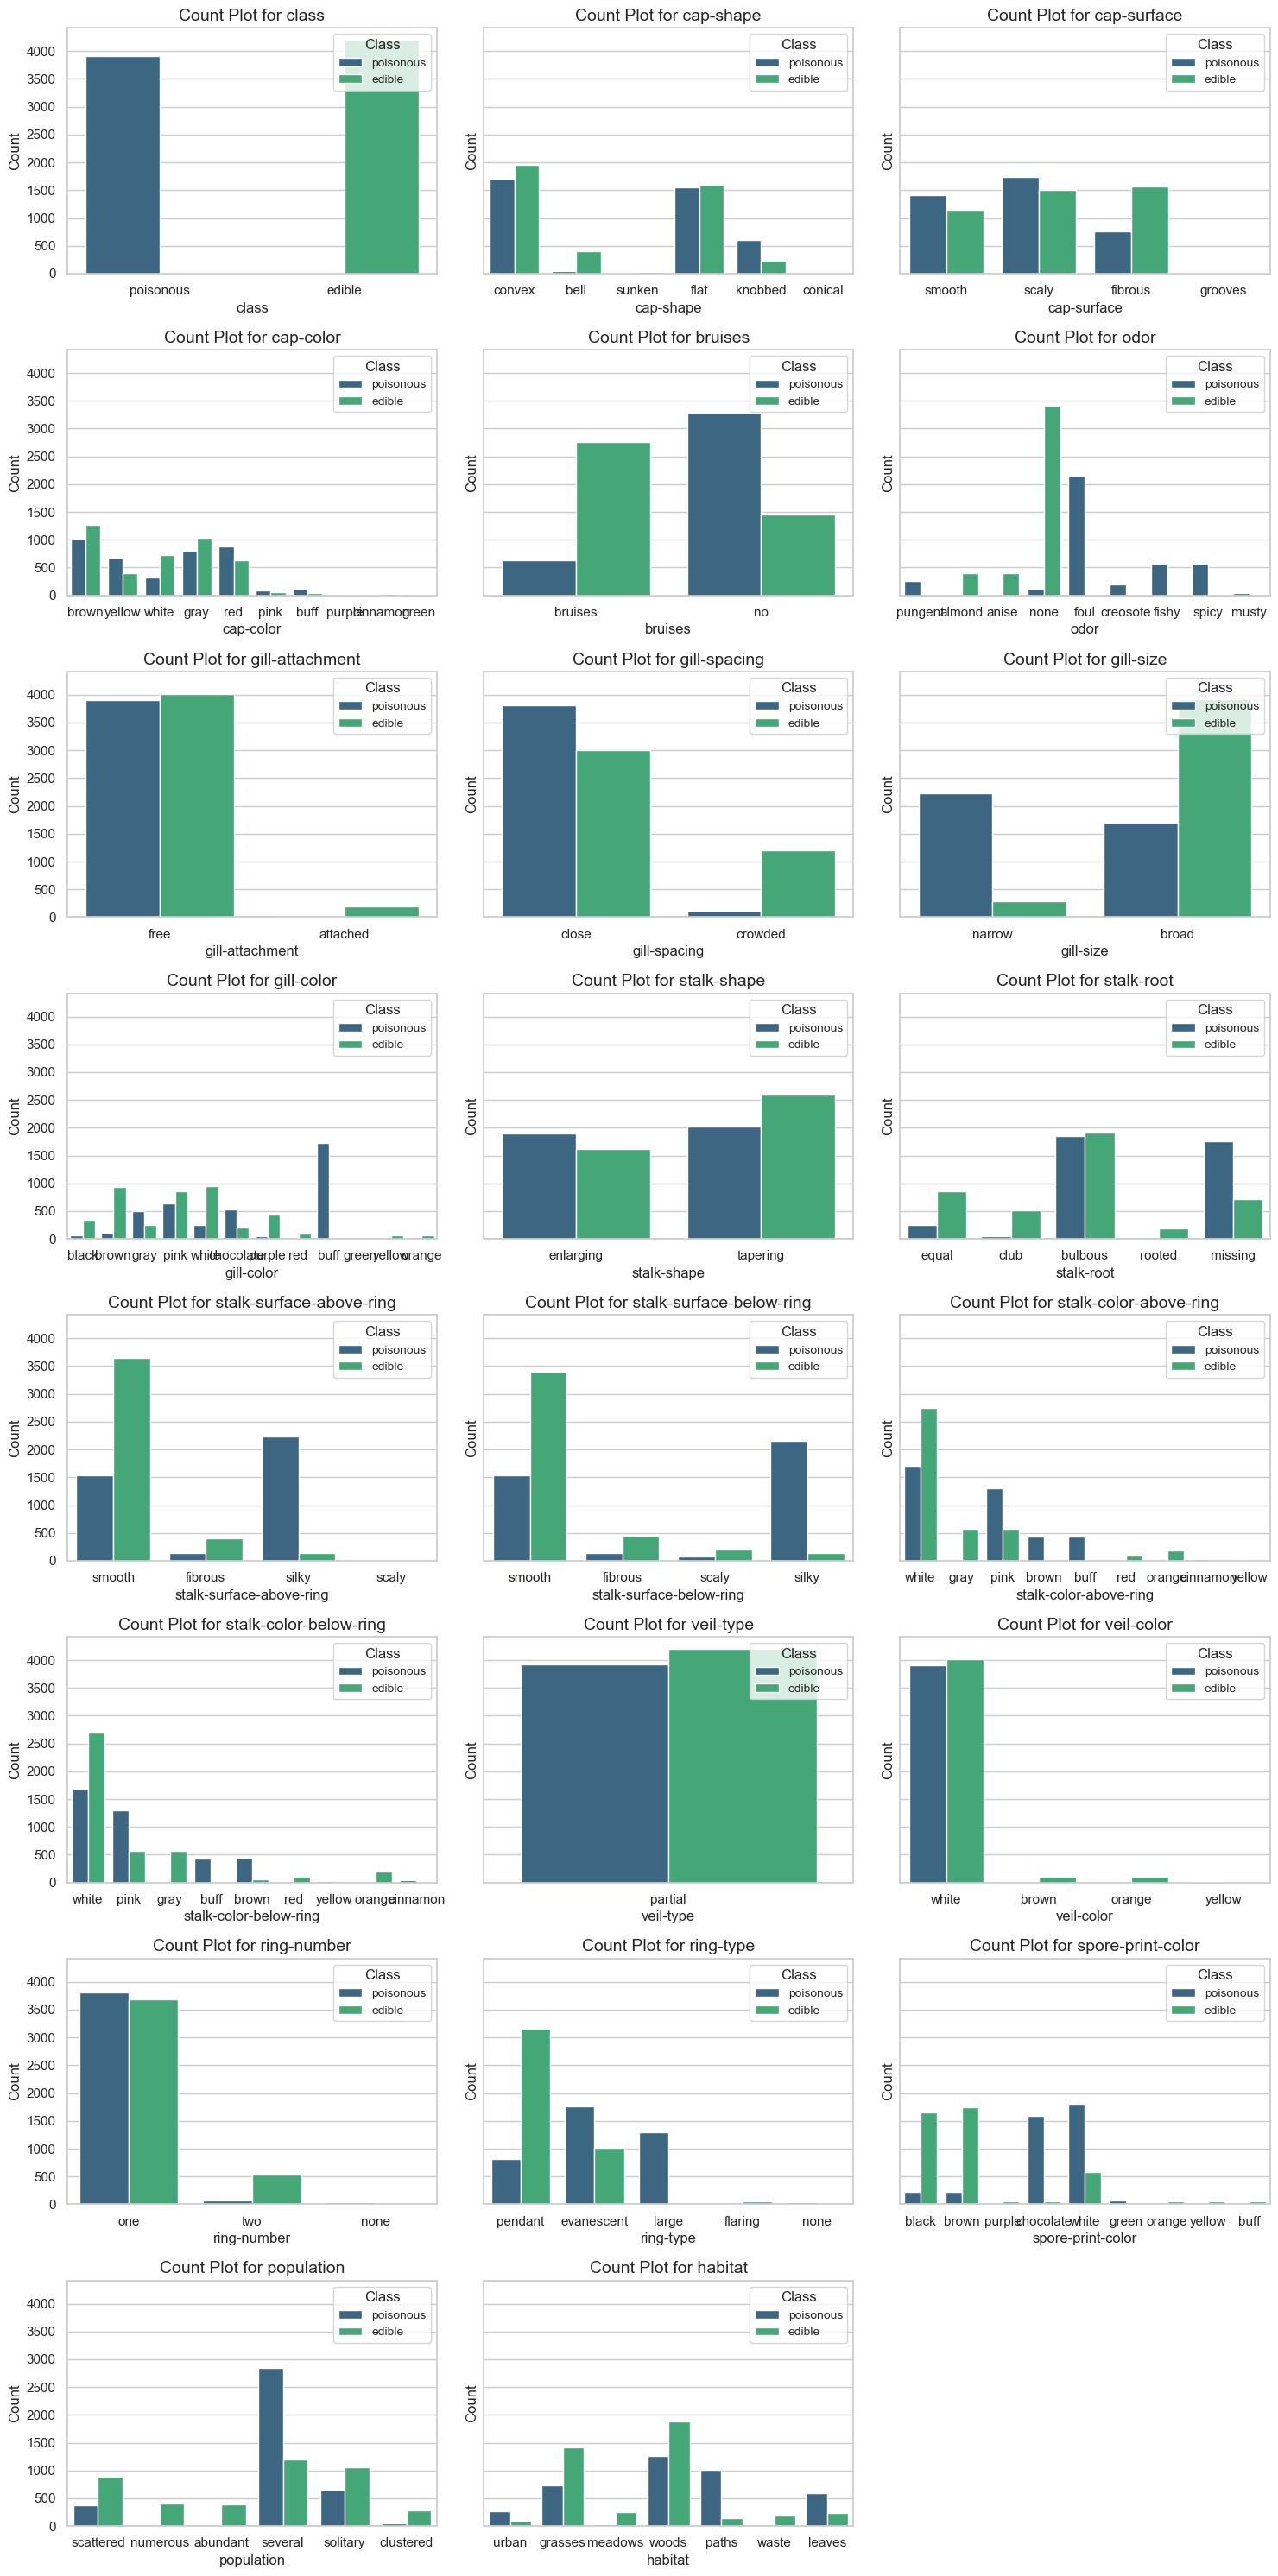

In [312]:
# set the numbers of columns for the subplot
num_cols = 3
num_rows = len(df.columns) // num_cols + (len(df.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30), sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # vertical and horizontal spacing
axes = axes.flatten()

palette = sns.color_palette("viridis", n_colors=len(df['class'].unique()))

# Loop through columns and create count plots
for i, col in enumerate(df.columns):
    sns.countplot(x=col, hue='class', data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Count Plot for {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Class', loc='upper right', fontsize=10)

# Remove empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 4. Preprocessing

### 4.1 Encoding

In [313]:
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [314]:
df.head()

class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2                   smooth                  white                  white   
3                   smooth                  white                  white   
4                   smooth                  white                  white   

  veil-type veil-color ring-number   ring-type spore-print-color population  \
0   partial      white         one     pendant             black  scattered   
1   partial      white         one     pendant             brown   numerous   
2   partial      white         one     pendant             brown   numerous   
3   partial      white         one     pendant             black  scattered   
4   partial      white         one  evanescent             brown   abundant   

   habitat  
0    urban  
1  grasses  
2  meadows  
3    urban  
4  grasses  

[5 rows x 23 columns]

In [315]:
# we create a label encoder for encoding our categorical variables
encoders = {}

for column in df.columns:
    encoding = LabelEncoder()
    df[column] = encoding.fit_transform(df[column].astype(str))
    encoders[column] = encoding

In [316]:
df.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          2            3          0        0     7                1   
1      0          2            3          9        0     0                1   
2      0          0            3          8        0     1                1   
3      1          2            2          8        0     7                1   
4      0          2            3          3        1     6                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           0  ...                         3   
1             0          0           0  ...                         3   
2             0          0           1  ...                         3   
3             0          1           1  ...                         3   
4             1          0           0  ...                         3   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  0           3        4  
1            1          4                  1           2        0  
2            1          4                  1           2        2  
3            1          4                  0           3        4  
4            1          0                  1           0        0  

[5 rows x 23 columns]

### 4.2 Outlighting outliers

In [274]:
fig = px.box(df, title='Highlighting outliers')
fig.update_layout(xaxis_title='Variable', yaxis_title='Value')
fig.show()

As the dataset seams very clean, we will not delete extrem values.

In [275]:
df = df.drop(columns=['veil-type'])

### 4.3 Heatmap 

<Axes: title={'center': 'Correlation Matrix of the dataset'}>

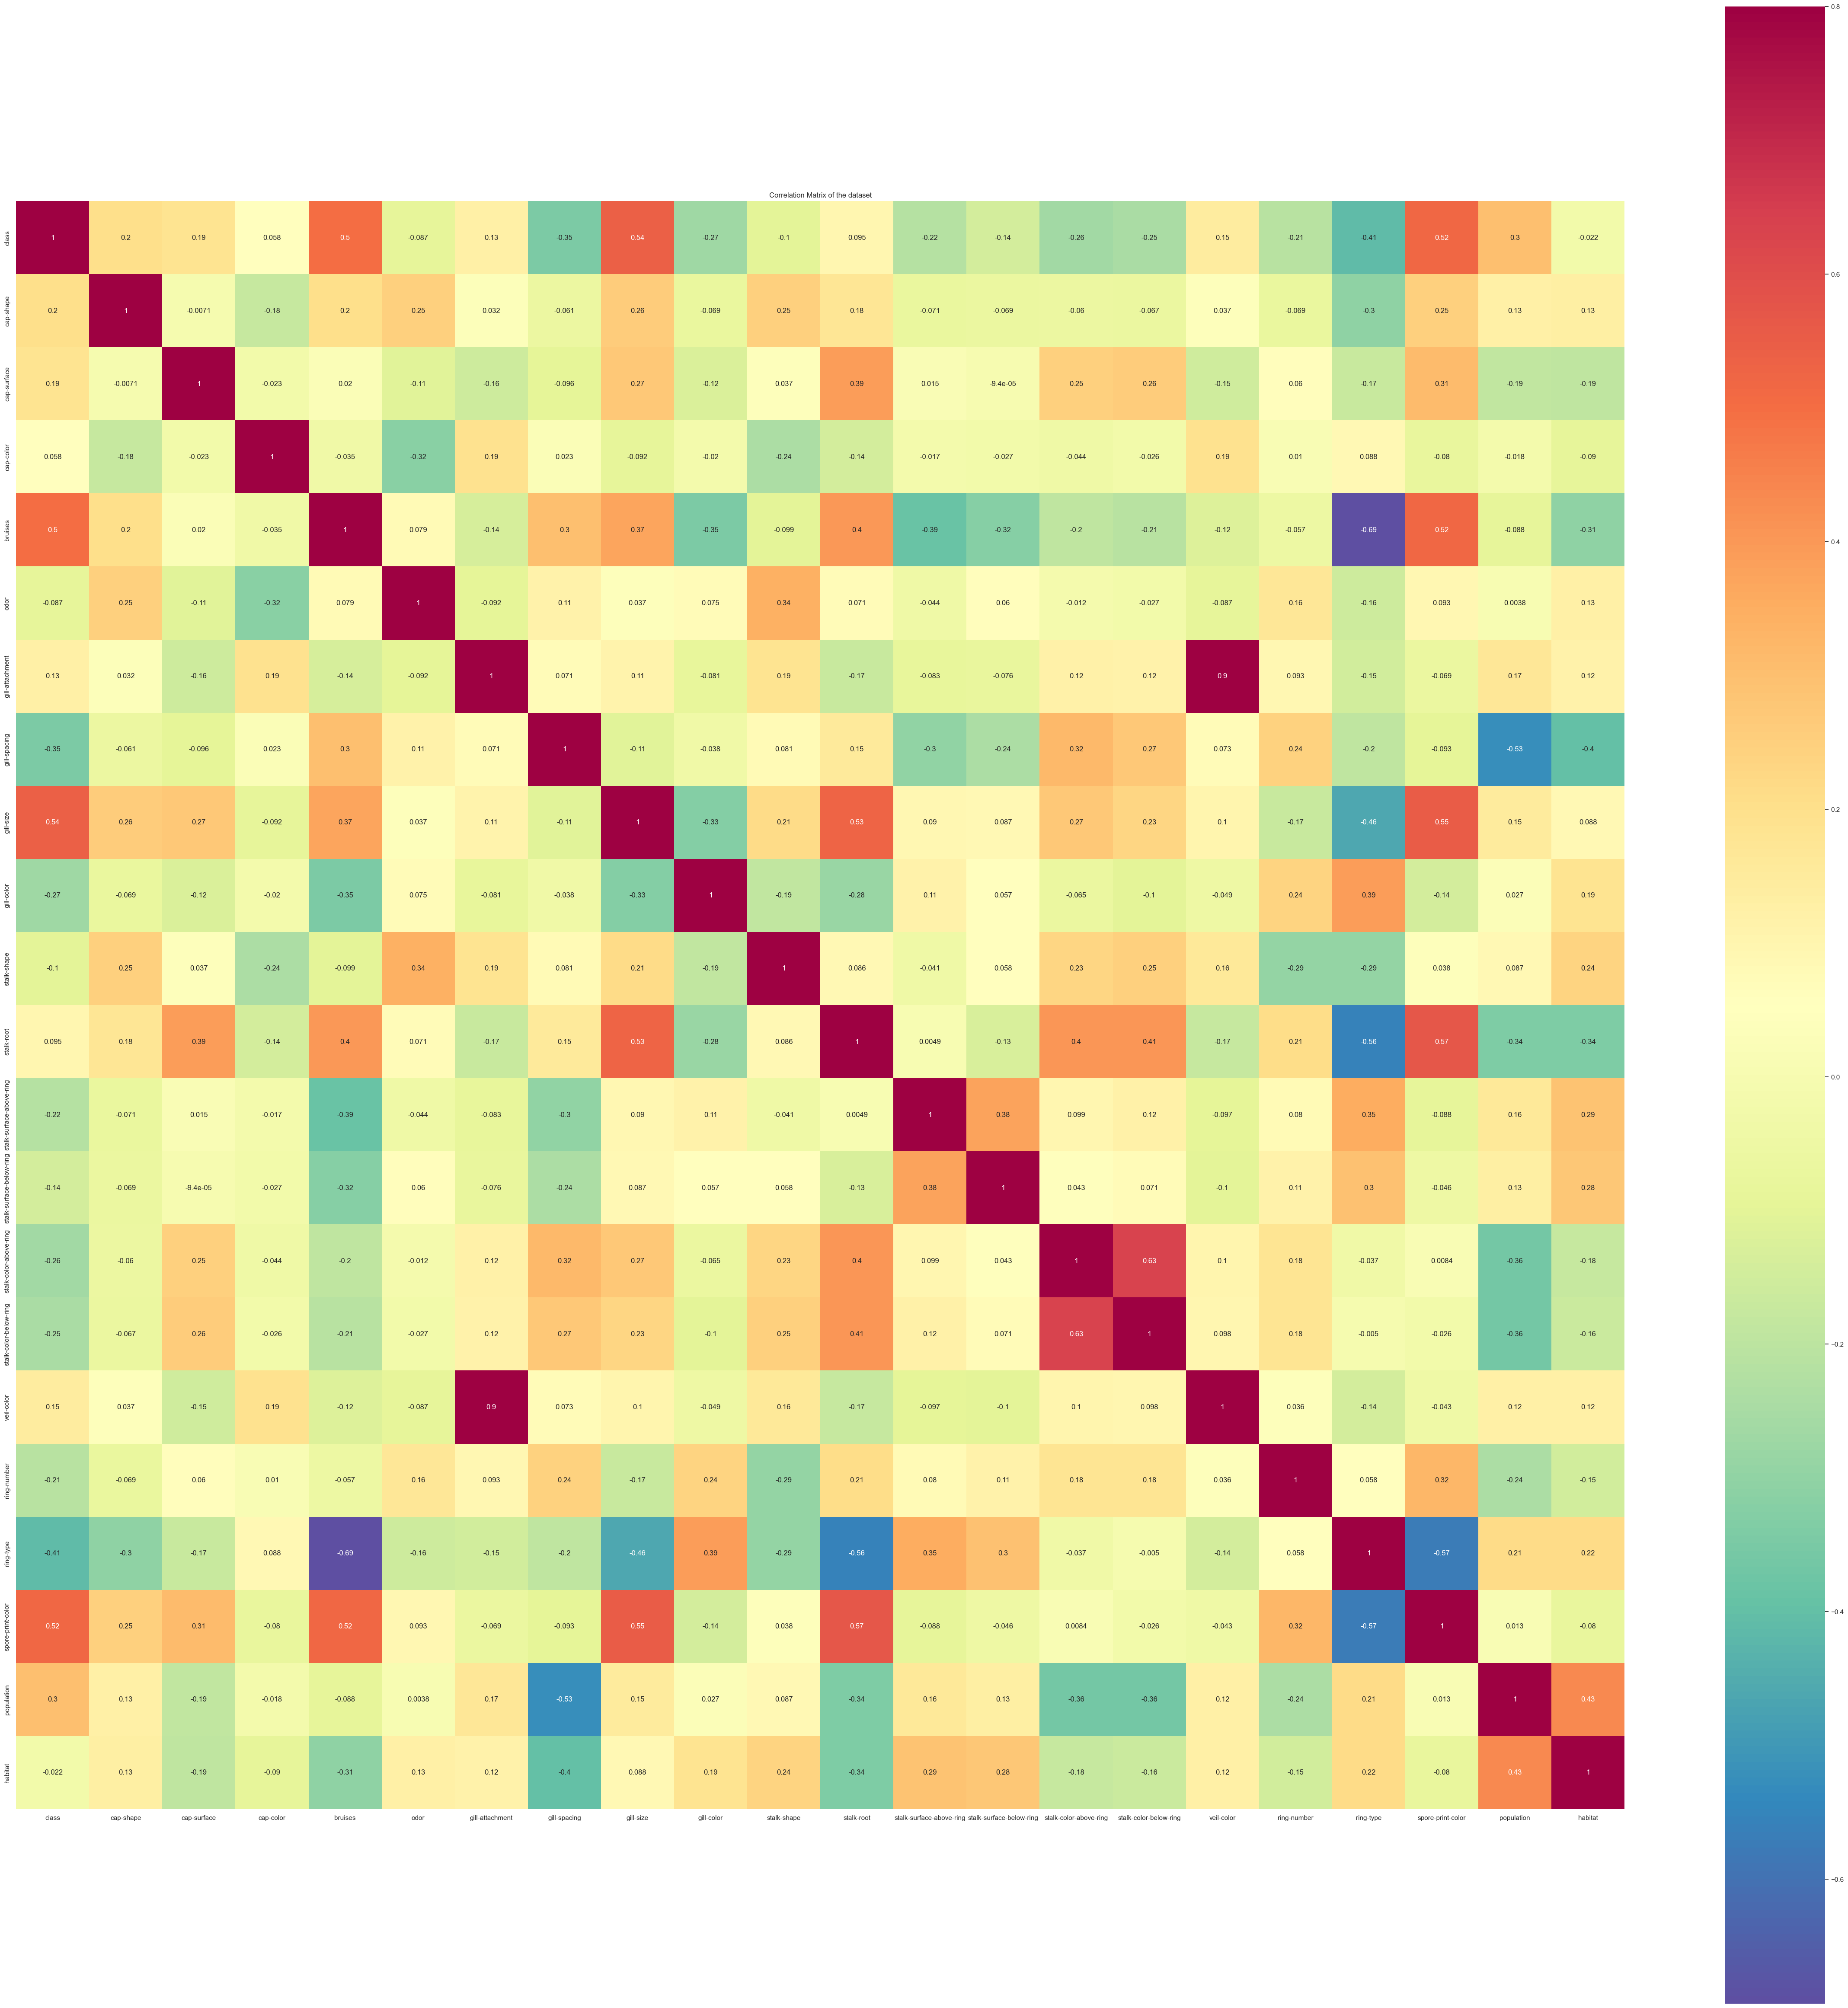

In [276]:
plt.figure(figsize=(60,60))
plt.title('Correlation Matrix of the dataset')
sns.heatmap(df.corr(),vmax=.8, annot=True,square=True,cmap='Spectral_r')

Since the correlation matrix is really big it is hard to understand, lets plot the features where their correlations are above 0.6 or under -0.6 to filter the important informations.

C:\Users\cassi\AppData\Local\Temp\ipykernel_29428\1471972495.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



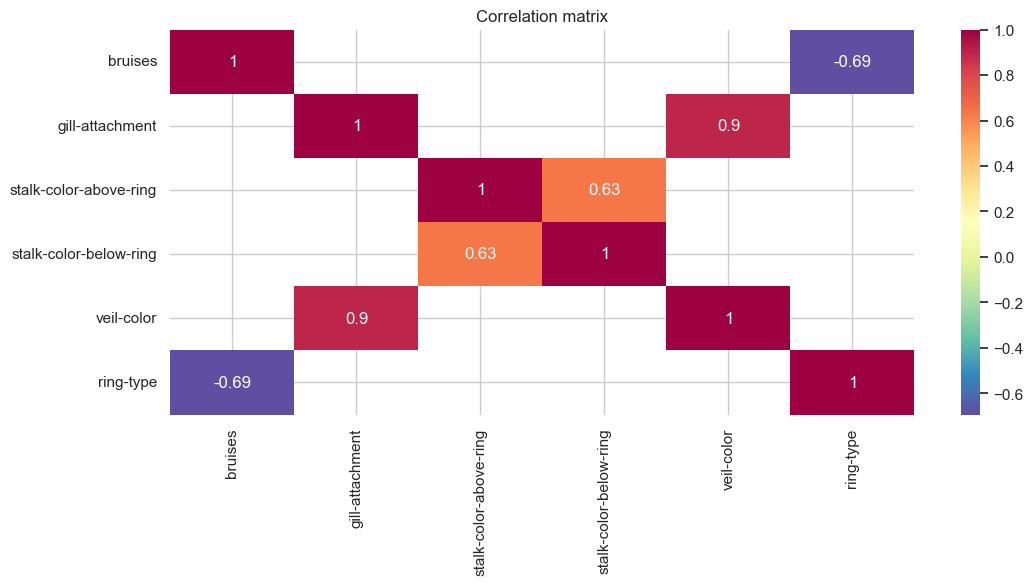

In [277]:
# The correlation matrix
correlation_matrix = df.corr()

# Here we filter all the correlations above 0.7 or under -0.7 to filter the important informations
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.6]

# We search for the sum of each line. If it's 1, it means that there is only the diagonal 1 value in this line
# For an easier visualisation we need to remove those lines
somme_lignes = strong_correlations.sum(axis=1)
strong_correlation_lignes = strong_correlations[somme_lignes != 1].copy()

#We do the same thing with the columns, except this time we also need to check the empty columns and also drop them
columns_sum = strong_correlation_lignes.sum(axis=0)
strong_correlation_lignes_colonne = strong_correlation_lignes[columns_sum !=1].copy()
strong_correlation_sans_nan = strong_correlation_lignes_colonne.dropna(axis=1, how='all')

plt.figure(figsize=(12,5))
sns.heatmap(strong_correlation_sans_nan, annot=True, cmap='Spectral_r')
plt.title('Correlation matrix')
plt.show()

Highly correlated features can make certain models more sensitive to small variations in the data. Therefore, in some cases, eliminating correlated features can improve the stability of the model. That is why we drop the column gill attachement.

In [278]:
df = df.drop(columns=['gill-attachment'])

### 4.4 Standardisation

Standardizing data is helpful because it makes all the numbers in the dataset play nicely together. It ensures that each piece of information is treated fairly, preventing one type of information from dominating others just because it's bigger.

In [279]:
# use standardscaler to standardize our dataset
scaler = StandardScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]]) # apply it to all the dataset except the target class

In [280]:
df.head()

class  cap-shape  cap-surface  cap-color   bruises      odor  gill-spacing  \
0      1  -0.545782     1.065669  -1.255302 -1.185917  1.115027     -0.438864   
1      0  -0.545782     1.065669   1.357802 -1.185917 -2.413988     -0.438864   
2      0  -2.764967     1.065669   1.067457 -1.185917 -1.909843     -0.438864   
3      1  -0.545782     0.217892   1.067457 -1.185917  1.115027     -0.438864   
4      0  -0.545782     1.065669  -0.384267  0.843230  0.610882      2.278612   

   gill-size  gill-color  stalk-shape  ...  stalk-surface-above-ring  \
0   1.494683   -1.415071    -1.144806  ...                  0.615908   
1  -0.669038   -1.415071    -1.144806  ...                  0.615908   
2  -0.669038   -1.115866    -1.144806  ...                  0.615908   
3   1.494683   -1.115866    -1.144806  ...                  0.615908   
4  -0.669038   -1.415071     0.873511  ...                  0.615908   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                  0.660796                0.724622                0.732112   
1                  0.660796                0.724622                0.732112   
2                  0.660796                0.724622                0.732112   
3                  0.660796                0.724622                0.732112   
4                  0.660796                0.724622                0.732112   

   veil-color  ring-number  ring-type  spore-print-color  population   habitat  
0    0.142037    -0.256132   0.948081          -1.083856   -0.514389  0.307811  
1    0.142037    -0.256132   0.948081          -0.729891   -1.313108 -1.272882  
2    0.142037    -0.256132   0.948081          -0.729891   -1.313108 -0.482535  
3    0.142037    -0.256132   0.948081          -1.083856   -0.514389  0.307811  
4    0.142037    -0.256132  -1.272216          -0.729891   -2.910546 -1.272882  

[5 rows x 21 columns]

### 4.5 Spliting data

In [281]:
X = df.drop(['class'],axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

## 5. Modeling & Predictions

We decide to make predictions using 3 different classifiers, each one of them having their own characteristics : 


- Random Forest: Robust and capable of handling complex and nonlinear datasets. It excels in detecting nonlinear relationships between mushroom attributes and edibility while offering good resistance to overfitting.

- k-Nearest Neighbors (KNN): KNN is effective for capturing local relationships in data. If the edibility of mushrooms is influenced by similar features among nearby mushrooms in the feature space, KNN could be a good option.

- Logistic Regression: It's a classic choice for classification problems. If the relationship between mushroom features and edibility is primarily linear, logistic regression could be simple and interpretable.

By using different classifier we will be able to determine which one is the most accurate for our dataset.

### 5.1 Random Forest Classifier

In [282]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [i for i in range(1, 100)], 
    'criterion': ['gini', 'entropy']
}

#grid search for the random forest model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#best parameters for the random forest model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)
print("Best Score: ", best_score)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


Best Parameters:  {'criterion': 'gini', 'n_estimators': 3}
Best Score:  1.0


In [283]:
n_estimators = [i for i in range(1, 50)]
scores = []

for k in n_estimators:
    rf = RandomForestClassifier(criterion='gini', n_estimators=k)  
    score = np.mean(cross_val_score(rf, X, y, cv=5, scoring='accuracy'))
    scores.append(score)

# Create a DataFrame for visualization
df_visualisation_random_forest = pd.DataFrame({'Number of Estimators': n_estimators, 'Accuracy Score': scores})

# Plot using Plotly Express
fig = px.line(df_visualisation_random_forest, x='Number of Estimators', y='Accuracy Score', title='Accuracy Score for different number of estimators',
              labels={'Accuracy Score': 'Accuracy Score'})

fig.update_traces(marker=dict(color='blue', size=8))

fig.show()


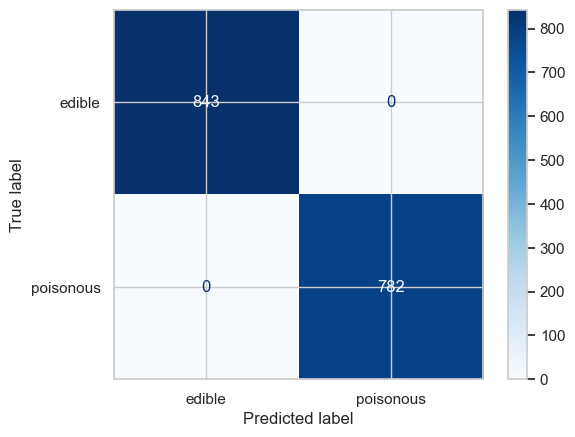

In [284]:
rf_model = RandomForestClassifier(criterion='gini', n_estimators= best_parameters['n_estimators'])
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [285]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Mean Squared Error: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


In [286]:
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# we select the top 10 features
top_n = 10
top_features = X.columns[sorted_idx][:top_n]
top_feature_importances = feature_importances[sorted_idx][:top_n]

# make percentage importance
total_importance = np.sum(top_feature_importances)
percentage_importance = (top_feature_importances / total_importance) * 100

# crezting a DataFrame for plotting
plot_data = pd.DataFrame({"Feature": top_features, "Importance": percentage_importance})

fig = px.bar(plot_data, x="Feature", y="Importance", text="Importance",title="Top 10 Feature Importance",
             labels={"Importance": "Percentage Importance"},color="Importance",
             color_continuous_scale=px.colors.sequential.Viridis,height=500)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title="Feature", yaxis_title="Percentage Importance", title_x=0.5)

fig.show()

This plot is useful to see which feature matters to determine the poisonability of a mushroom.

Cross-validation is useful because it provides a robust and unbiased estimate of a model's performance by training and testing on different subsets of the dataset.

Cross-Validation Scores: [0.86707692 1.         1.         1.         0.88793103]
Mean Cross-Validation Score: 0.95
Median Cross-Validation Score: 1.0


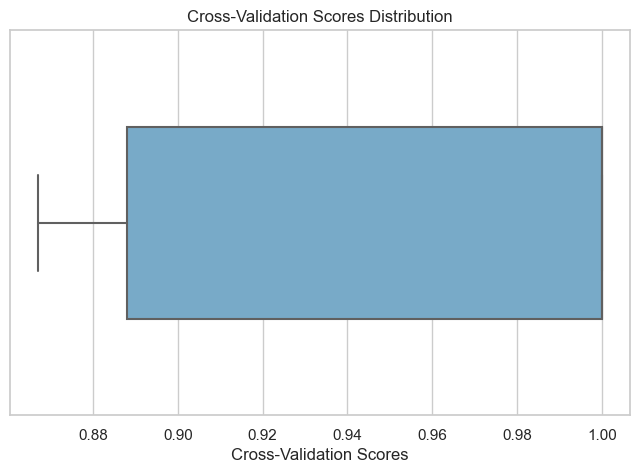

In [287]:
# perform cross validation
cross_val_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores_rf)
print("Mean Cross-Validation Score:", np.round(np.mean(cross_val_scores_rf),2))
print("Median Cross-Validation Score:", np.round(np.median(cross_val_scores_rf),2))


# graphique des scores
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x=cross_val_scores_rf, width=0.5, palette="Blues")
plt.title("Cross-Validation Scores Distribution")
plt.xlabel("Cross-Validation Scores")
plt.show()


Using cross validation our Random Forest model can predict the poisonability of a mushroom with an average accuracy of 89%.

### 5.2 K-Nearest Neighbors (KNN)

For the K-Nearest Neighbors we will procede as before: using grid search to find the best parameters and then using cross validation to check our accuracy.

In [288]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [i for i in range(1, 10)],
    'weights': ['uniform', 'distance'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


#best parameters for the knn model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)
print("Best Score: ", best_score)

c:\Users\cassi\anaconda3\envs\pyA4S1\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\cassi\anaconda3\envs\pyA4S1\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    # If `_MultimetricScorer` raises exception, the `error_score`
  File "c:\Users\cassi\anaconda3\envs\pyA4S1\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\cassi\anaconda3\envs\pyA4S1\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\cassi\anaconda3\envs\pyA4S1\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\cassi\anaconda3\envs\

Best Parameters:  {'n_neighbors': 1, 'weights': 'distance'}
Best Score:  1.0


c:\Users\cassi\anaconda3\envs\pyA4S1\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning:

One or more of the test scores are non-finite: [       nan 1.                nan 1.                nan 1.
        nan 1.                nan 0.99984604        nan 0.99984604
        nan 0.99969219        nan 0.99953822        nan 0.99953834]



In [289]:
# Assuming X_train and X_test are DataFrames or other data structures
# Convert them to NumPy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Convert the target variable to a NumPy array if needed
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Now, use the NumPy arrays with the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train_np, y_train_np)
y_pred = knn.predict(X_test_np)

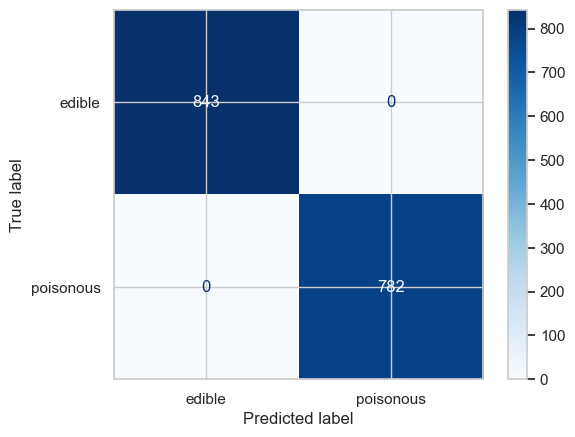

In [290]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [291]:
#knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
#knn.fit(X_train,y_train)
#y_pred = knn.predict(X_test)
#
#cm = confusion_matrix(y_test, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_encoder.classes_)
#disp.plot(cmap='Blues')
#plt.show()

In [292]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Mean Squared Error: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


In [293]:
#cross_val_scores_knn = cross_val_score(knn, X, y, cv=5)
#print("Cross-Validation Scores:", cross_val_scores_knn)
#print("Mean Cross-Validation Score:", np.round(np.mean(cross_val_scores_knn),2))
#print("Median Cross-Validation Score:", np.round(np.median(cross_val_scores_knn),2))
#
#
## graphique des scores
#sns.set(style="whitegrid")
#plt.figure(figsize=(8, 5))
#sns.boxplot(x=cross_val_scores_knn,width=0.5, palette="Blues")
#plt.title("Cross-Validation Scores Distribution")
#plt.xlabel("Cross-Validation Scores")
#plt.show()


Cross-Validation Scores: [0.87261538 1.         0.98892308 1.         0.66317734]
Mean Cross-Validation Score: 0.9
Median Cross-Validation Score: 0.99


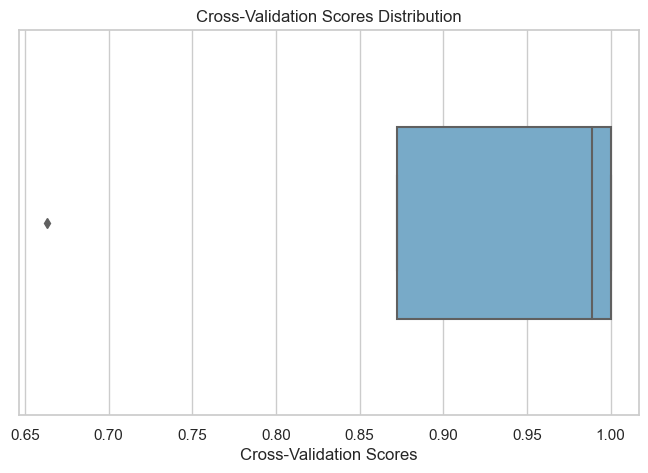

In [294]:
X_np = np.array(X)
y_np = np.array(y)

# Create a new instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# Cross-validation scores
cross_val_scores_knn = cross_val_score(knn, X_np, y_np, cv=5)
print("Cross-Validation Scores:", cross_val_scores_knn)
print("Mean Cross-Validation Score:", np.round(np.mean(cross_val_scores_knn), 2))
print("Median Cross-Validation Score:", np.round(np.median(cross_val_scores_knn), 2))

# Graphique des scores
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x=cross_val_scores_knn, width=0.5, palette="Blues")
plt.title("Cross-Validation Scores Distribution")
plt.xlabel("Cross-Validation Scores")
plt.show()

Using cross validation our K-Nearest Neigbhors model can predict the poisonability of a mushroom with an average accuracy of 90%.

### 5.3 Logistic Regression

In [295]:
lr = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#grid search for the random forest model
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#best parameters for the random forest model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)
print("Best Score: ", best_score)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.9687648487001835


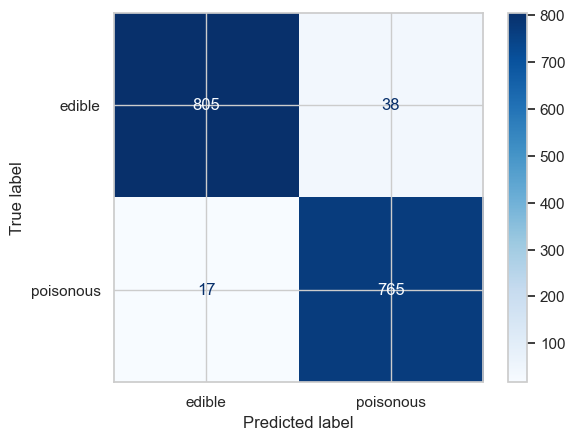

In [296]:
lr = LogisticRegression(penalty=best_parameters['penalty'],C=best_parameters['C'],solver= best_parameters['solver'])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [297]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Mean Squared Error: 0.033846153846153845
Precision: 0.9526774595267746
Recall: 0.9782608695652174
F1 Score: 0.9652996845425867
Accuracy: 0.9661538461538461


Cross-Validation Scores: [0.83015385 0.98338462 0.92430769 0.99384615 0.79433498]
Mean Cross-Validation Score: 0.91
Median Cross-Validation Score: 0.92


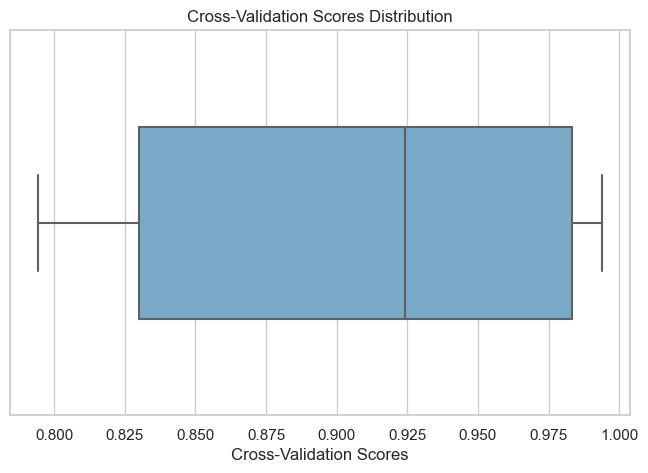

In [298]:
cross_val_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores_lr)
print("Mean Cross-Validation Score:", round(np.mean(cross_val_scores_lr),2))
print("Median Cross-Validation Score:", round(np.median(cross_val_scores_lr),2))

# graphique des scores
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x=cross_val_scores_lr,width=0.5, palette="Blues")
plt.title("Cross-Validation Scores Distribution")
plt.xlabel("Cross-Validation Scores")
plt.show()

Using cross validation our Logistic Regression model can predict the poisonability of a mushroom with an average accuracy of 90%.

## 6. Conclusion

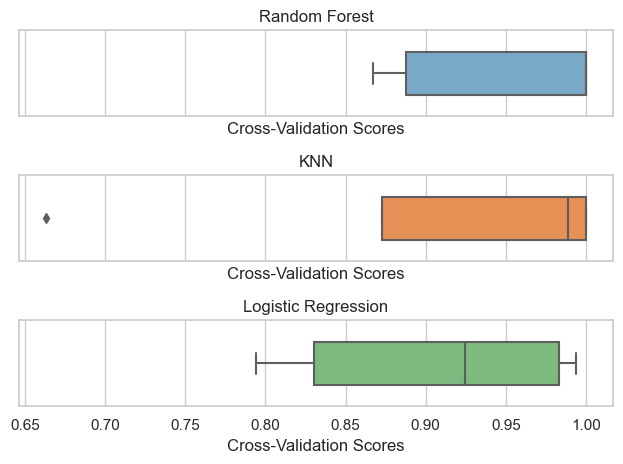

In [299]:

fig, ax = plt.subplots(3, 1, sharex=True)
# Random Forest
plt.subplot(311) # the boxplot share the same scale
sns.boxplot(x=cross_val_scores_rf, width=0.5, palette="Blues")
plt.title("Random Forest")
plt.xlabel("Cross-Validation Scores")

# K-Nearest Neighbors (knn)
plt.subplot(312)
sns.boxplot(x=cross_val_scores_knn, width=0.5, palette="Oranges")
plt.title("KNN")
plt.xlabel("Cross-Validation Scores")

# Logistic Regression
plt.subplot(313)
sns.boxplot(x=cross_val_scores_lr, width=0.5, palette="Greens")
plt.title("Logistic Regression")
plt.xlabel("Cross-Validation Scores")

plt.tight_layout()
plt.show()


To conclude our 3 models have an accuracy score over 90%. However it seems the Knn is the model the most a accurate to predict poisonnability of mushrooms.


## 7. Testing

In [420]:
with open('examples.json', 'r') as file:
    loaded_examples = json.load(file)

cep_example_imported = loaded_examples['cep_example']
morille_example_imported = loaded_examples['morille_example']
fly_agaric_example_imported = loaded_examples['fly_agaric_example']
cudonia_example_imported = loaded_examples['cudonia_example']

test_data = pd.DataFrame(cep_example_imported)

In [421]:
mushroom_name = test_data.loc[0, 'name']
test_data = test_data.drop(columns='name')

In [422]:
# First we encode the new row : 
for column in test_data.columns:
    encoding = encoders[column]
    test_data[column] = encoding.fit_transform(test_data[column].astype(str))

# Then we standardize 
test_data[test_data.columns[1:]] = scaler.fit_transform(test_data[test_data.columns[1:]]) 

# Then we predict using logistic regression
test_prediction= lr.predict(test_data)

# Then we use the dictionnary of encoding to decode the target value predicted
label_encoder_class = encoders['class'] 
test_prediction = label_encoder_class.inverse_transform(test_prediction)

# We print the predicted result
print(f"The prediction for {mushroom_name} is that it is {test_prediction[0]}.")

The prediction for cep is that it is edible.
